ANMOL CHAUBEY
24MAI0111

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Border_crossing_Entry_Data.csv')

In [4]:
df.shape

(394101, 10)

In [5]:
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
0,Roma,Texas,2310,US-Mexico Border,Dec 2023,Buses,46,26.404,-99.019,POINT (-99.018981 26.403928)
1,Del Rio,Texas,2302,US-Mexico Border,Dec 2023,Trucks,6552,29.327,-100.928,POINT (-100.927612 29.326784)
2,Roma,Texas,2310,US-Mexico Border,Nov 2023,Trucks,3753,26.404,-99.019,POINT (-99.018981 26.403928)
3,Douglas,Arizona,2601,US-Mexico Border,Oct 2023,Buses,13,31.334,-109.560,POINT (-109.560344 31.334043)
4,Beecher Falls,Vermont,206,US-Canada Border,Aug 2023,Trucks,422,45.013,-71.505,POINT (-71.505309 45.013411)


In [13]:
df.isnull().sum()
print("ANMOL CHAUBEY 24MAI0111")

ANMOL CHAUBEY 24MAI0111


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df.head()

C:\Users\Anmol Chaubey\AppData\Local\Temp\ipykernel_26776\1787965345.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point,Month
0,Roma,Texas,2310,US-Mexico Border,2023-12-01,Buses,46,26.404,-99.019,POINT (-99.018981 26.403928),12
1,Del Rio,Texas,2302,US-Mexico Border,2023-12-01,Trucks,6552,29.327,-100.928,POINT (-100.927612 29.326784),12
2,Roma,Texas,2310,US-Mexico Border,2023-11-01,Trucks,3753,26.404,-99.019,POINT (-99.018981 26.403928),11
3,Douglas,Arizona,2601,US-Mexico Border,2023-10-01,Buses,13,31.334,-109.560,POINT (-109.560344 31.334043),10
4,Beecher Falls,Vermont,206,US-Canada Border,2023-08-01,Trucks,422,45.013,-71.505,POINT (-71.505309 45.013411),8


In [8]:
le = LabelEncoder()
df['Measure'] = le.fit_transform(df['Measure'])
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point,Month
0,Roma,Texas,2310,US-Mexico Border,2023-12-01,1,46,26.404,-99.019,POINT (-99.018981 26.403928),12
1,Del Rio,Texas,2302,US-Mexico Border,2023-12-01,11,6552,29.327,-100.928,POINT (-100.927612 29.326784),12
2,Roma,Texas,2310,US-Mexico Border,2023-11-01,11,3753,26.404,-99.019,POINT (-99.018981 26.403928),11
3,Douglas,Arizona,2601,US-Mexico Border,2023-10-01,1,13,31.334,-109.560,POINT (-109.560344 31.334043),10
4,Beecher Falls,Vermont,206,US-Canada Border,2023-08-01,11,422,45.013,-71.505,POINT (-71.505309 45.013411),8


In [9]:
features = ['Month', 'Measure', 'Value']
scaler = StandardScaler()
sclaed_feature = scaler.fit_transform(df[features])

In [10]:
kmeans = KMeans(n_clusters = 5, random_state=42 )
df['Cluster'] = kmeans.fit_predict(sclaed_feature)

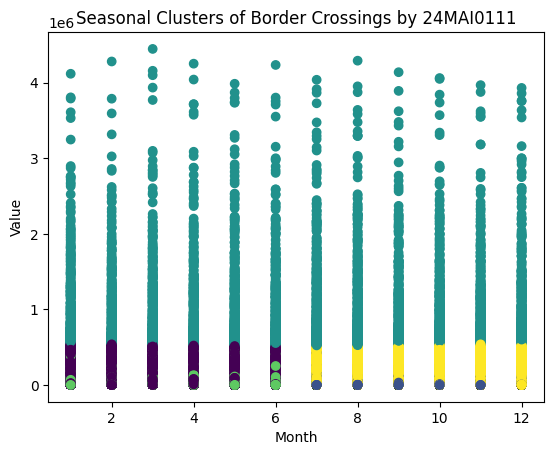

In [14]:
scatter = plt.scatter(df['Month'], df['Value'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Seasonal Clusters of Border Crossings by 24MAI0111')
plt.show()

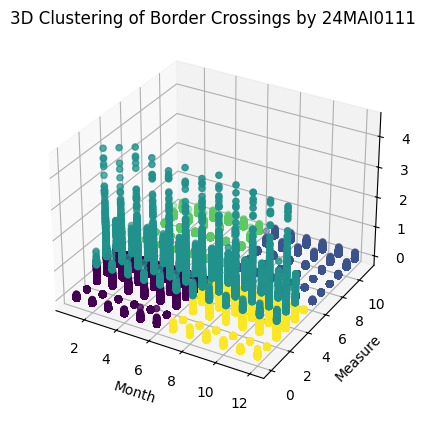

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Month'], df['Measure'], df['Value'], c=df['Cluster'], cmap='viridis')
ax.set_xlabel('Month')
ax.set_ylabel('Measure')
ax.set_zlabel('Value')
plt.title('3D Clustering of Border Crossings by 24MAI0111')
plt.show()
